In [1]:
from si import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
fs = {"Default (2-3)":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_2_3.root"),
      "3-4":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root"),
      "4-5":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_4_5.root"),
      "6-8":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_6_8.root")
     }
datasetname = "EndGame"
adt_params_low_ct = [2,3,4,6]

fs["3-4"].ls()

TFile**		./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root	
 TFile*		./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root	
  KEY: TDirectoryFile	clusters;1	clusters (CaloHitPositions) folder


In [3]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

Starting Default (2-3)
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 3-4
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 4-5
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 6-8
    Calo  1
    Calo  2
    C

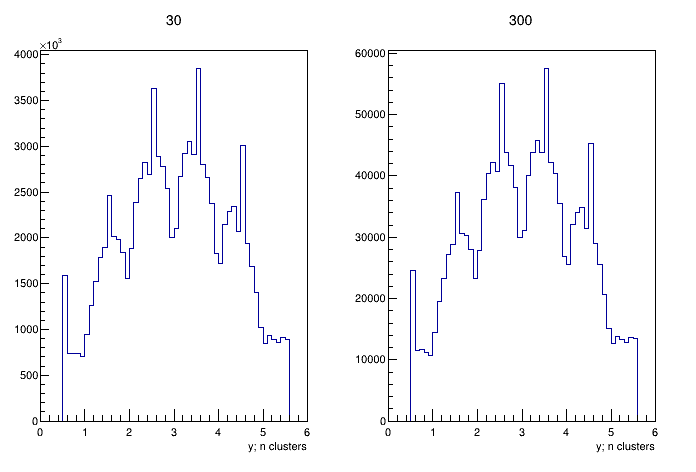

In [23]:
datasetfits = {}
datasetslopes = {}
datasetslopeErrs = {}
for name in fs:
    print("Starting", name)
    f = fs[name]
    allFitResults = {}
    slopes = []
    slopeErrs = []
    for calo in range(1,25):
        print("    Calo ", calo)
        #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        try:
            randclusters = f.Get("clusters/randclusters"+str(calo)).Clone()
        except:
            randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        randclusters.Rebin3D(1,1,1)
        randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(1000),randclusters.GetYaxis().FindBin(2400))
#         widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

        tlow = 30
        thigh = 300
        twidth = 20
        
        means = []
        meanErrs = []
        
        c = r.TCanvas()
        c.Divide(2)
        for i,time in enumerate([tlow, thigh]):
            randclusters.GetXaxis().SetRange(randclusters.GetXaxis().FindBin(time),randclusters.GetXaxis().FindBin(time+twidth))
            c.cd(i+1)
            hi = randclusters.Project3D("z").Clone()
            hi.SetTitle(str(time))
            hi.DrawCopy("hist")
            means.append( hi.GetRMS(1)*25 )
            meanErrs.append( hi.GetRMS(11)*25 )
        c.Draw()
#         print(means, means[0] - means[1])

#         c = r.TCanvas()
#         randclusters.Project3D("z").Draw("colz")
#         c.Draw()
        
        slopes.append(means[1] - means[0])
        slopeErrs.append(math.sqrt((meanErrs[1]**2) + (meanErrs[0]**2)))
#         break
    datasetfits[name] = allFitResults
    datasetslopes[name] = slopes
    datasetslopeErrs[name] = slopeErrs
#     break

In [24]:
print(slopes)

[0.06363727416576381, 0.06545009449148154, 0.046068636036093125, 0.05061514415493917, 0.07108659276612883, 0.07106414602889899, 0.05842811264629688, 0.06893312330859658, 0.08762319645282446, 0.07335704107507723, 0.06172717479040202, 0.06575790514289892, 0.05094483199795263, 0.05910826556102933, 0.05760945731509892, 0.08695535419263933, 0.057278943780524116, 0.05764272719278907, 0.03379960945587612, 0.0704178292080968, 0.06919800623085237, 0.051082736216610414, 0.04781497969317172, 0.06393096545009413]


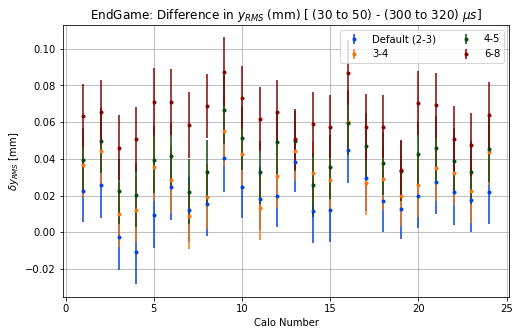

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:forest green', 'xkcd:dark red']
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    color=colors[i]
    plt.errorbar([x for x in range(1,25)], slopes, yerr=datasetslopeErrs[name], fmt=".",label=name, color=color)
#     mean = np.mean(slopes)
#     plt.plot([0,25], [mean,mean], ":", label=name+" mean: "+str(format(mean, "2.2E")), color=color)
#plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(datasetname+r": Difference in $y_{RMS}$ (mm) [ ("+str(tlow)+" to "+str(tlow+twidth)+") - ("+str(thigh)+" to "+str(thigh+twidth)+r") $\mu s$]")
plt.xlabel("Calo Number")
plt.ylabel(r"$\delta y_{RMS}$ [mm]")
plt.legend(ncol=2)
# fit.f.SetParameters(0.0001,0.00001, 0.25,0)
# fit.drawFitResult(ax)
# plt.ylim(0,0.00045)
plt.show()

[0.0036066660307840686, 0.009859011216849112] [0.023354395871704854, 0.005793837018082895]
[0.011103994219319027, 0.009374133669366421] [0.024066526213389186, 0.005969891033528792]
[-0.026883955077218365, 0.012197398721998107] [0.023994636163262497, 0.005952216919890389]
[-0.03707042383542439, 0.014709250612251642] [0.0240600044381757, 0.005969036905837624]
[-0.01531659551418003, 0.014454553529618252] [0.024895605924964127, 0.006175111920285235]
[-0.00381354611361121, 0.012075310834244707] [0.024443042579339363, 0.006063618376378021]
[-0.021365974296317137, 0.0124634554730261] [0.024240702475007547, 0.006013243283828508]
[-0.01792786042120985, 0.01389156970886441] [0.023929629724093664, 0.0059360629626407585]
[0.018906844069354743, 0.01162110687223154] [0.025377679997279398, 0.006294864449750297]
[0.004379128031677746, 0.01167000499989681] [0.023630087968256382, 0.005861845464807367]
[-0.013637558078963326, 0.012021625308363735] [0.02346260860144169, 0.005820844529052638]
[-0.002629049

No handles with labels found to put in legend.


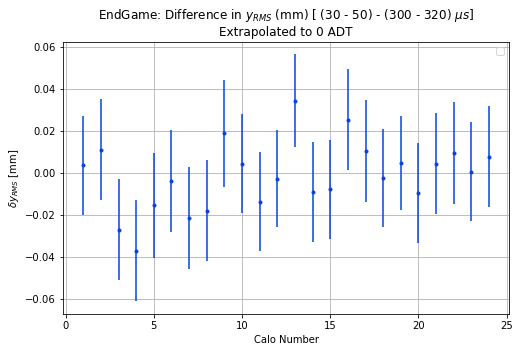

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:forest green', 'xkcd:dark red']
for i, slopes in enumerate(zip(*datasetslopes.values())):
#     print(slopes)
    errs = [x for x in zip(*datasetslopeErrs.values())][i]
#     print(errs)
    color='xkcd:blue'
    func = r.TF1("func","pol1",-10,10)
    fitresult = fitVector(adt_params_low_ct, slopes, func, yerr=errs)
#     fitresult.draw()
    print(fitresult.pars, fitresult.parErrs)
    plt.errorbar(i+1, fitresult.pars[0], yerr=fitresult.parErrs[0], fmt=".", color=color)
#     plt.errorbar([x for x in range(1,25)], slopes, yerr=datasetslopeErrs[name], fmt=".",label=name, color=color)
    
#     break
#     mean = np.mean(slopes)
#     plt.plot([0,25], [mean,mean], ":", label=name+" mean: "+str(format(mean, "2.2E")), color=color)
#plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(datasetname+r": Difference in $y_{RMS}$ (mm) [ ("+str(tlow)+" - "+str(tlow+twidth)+") - ("+str(thigh)+" - "+str(thigh+twidth)+r") $\mu s$]"+"\nExtrapolated to 0 ADT")
plt.xlabel("Calo Number")
plt.ylabel(r"$\delta y_{RMS}$ [mm]")
plt.legend(ncol=2)
# fit.f.SetParameters(0.0001,0.00001, 0.25,0)
# fit.drawFitResult(ax)
# plt.ylim(0,0.00845)
plt.show()

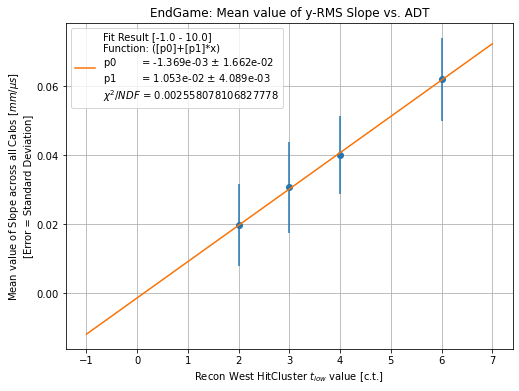

In [27]:
means = []
meanErrs = []
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    mean = np.mean(slopes)
    means.append(mean)
    meanErrs.append(np.std(slopes))
    
fig,ax = plt.subplots(figsize=(8,6))

plt.errorbar(adt_params_low_ct, means,yerr=meanErrs, fmt="o")
func = r.TF1("func","pol1",-1,10)
func.SetParameters(1,1)
fit = fitVector(adt_params_low_ct, means, func, yerr=meanErrs)
fit.drawFitResult(ax,100,xrange=[-1,7])

plt.title(datasetname+": Mean value of y-RMS Slope vs. ADT")
plt.xlabel(r"Recon West HitCluster $t_{low}$ value [c.t.]")
plt.ylabel(r"Mean value of Slope across all Calos [$mm/ \mu s$]"+"\n"+"[Error = Standard Deviation]")

plt.legend()
plt.grid()
plt.show()